Nombre: Juan Felipe Fajardo Garzón

IA y Mini-Robots

Algorítmo Genético para la Generación de una imagen objetivo

Importar las librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

Inicialización de variables

In [59]:
prob_muta = 0.2
patch_size = 20

Abrir la imagen objetivo y convertirla al formato del colormap, en este caso viridis

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[[96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]
 ...
 [96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]]


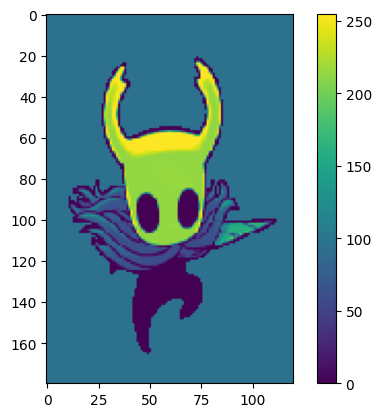

In [3]:

img = Image.open("knight.png") #Se abre el archivo de la imagen

img = img.resize((120, 180)) #la reescalamos al tamaño solicitado

img_gray = img.convert("L") #Convertimos los pixeles de la imagen en una escala de intensidad de 0 a 255

matriz_obj = np.array(img_gray)# Se convierte la imagen a una matriz de numpy
print(matriz_obj)

#Representación de la imagen
plt.imshow(matriz_obj, cmap='viridis')
plt.colorbar()
plt.show()


Generar nuestra población inicial de matrices

In [4]:
def pob_ini():
  pob = np.array([np.random.randint(0, 256, (180, 120)) for _ in range(50)])
  return pob

Función para imprimir la población como imagen

In [18]:
def imp(pob):
  plt.imshow(pob, cmap='viridis')
  plt.colorbar()
  plt.show()


Función que calcula la aptitud de toda la población y la guarda en un np array

In [43]:
def calc_aptitud(pob):
  aptitud = np.array([np.exp(-(np.mean((pob[i] - matriz_obj) ** 2))/1000) for i in range(50)])
  aptitud_norm = (aptitud - aptitud.min()) / (aptitud.max() - aptitud.min())
  return aptitud
print(calc_aptitud(pob_ini()))

[0.00015653 0.00012905 0.00014458 0.00014014 0.00013864 0.00012886
 0.00013321 0.00013406 0.00015372 0.00014587 0.00014766 0.00015278
 0.00014756 0.00014151 0.00014726 0.00013309 0.00014455 0.00014943
 0.00013815 0.00014952 0.00013755 0.00013216 0.00013813 0.00013676
 0.00013343 0.00013256 0.00012766 0.00015533 0.00013169 0.00014288
 0.00013408 0.0001424  0.00014709 0.00013986 0.0001497  0.00012894
 0.00015098 0.00012947 0.00012684 0.00017013 0.00014159 0.00012775
 0.00013306 0.0001448  0.00014434 0.00013875 0.00013771 0.00013372
 0.00012453 0.00013011]


Función que calcula la probabilidad de selección de cada cromosoma


In [44]:
def calc_prob(aptitud):
  prob = aptitud/np.sum(aptitud)
  return prob
print(calc_prob(calc_aptitud(pob_ini())))


[0.02012545 0.01929542 0.01877387 0.02058989 0.02019208 0.01988657
 0.01781828 0.01931156 0.02101189 0.02111103 0.01965894 0.01973841
 0.02239019 0.01900139 0.02045609 0.01842885 0.02184112 0.02086578
 0.01851433 0.02003807 0.02171131 0.01890334 0.01949247 0.0207619
 0.01944823 0.02228593 0.02083505 0.02040648 0.02064833 0.01839006
 0.01747874 0.02052175 0.02093463 0.02039509 0.02082562 0.02015746
 0.02073013 0.01996953 0.01880626 0.0197628  0.01971744 0.02027842
 0.01976897 0.02063827 0.01854317 0.02126132 0.01963567 0.01903584
 0.02011352 0.01949304]


Función de cruce por parches de 20 x 20 pixeles

In [60]:
def crossover_patch(parent_a, parent_b, patch_size=patch_size):
    h,w = parent_a.shape
    y = np.random.randint(0,h-patch_size)
    x = np.random.randint(0,w-patch_size)
    child = parent_a.copy()
    child[y:y+patch_size, x:x+patch_size] = parent_b[y:y+patch_size, x:x+patch_size]
    return child

Función que realiza la selección de los cromosomas más aptos, selección por ruleta

In [17]:
def seleccion(pob,prob):
  new_seleccion = []
  while True:
    if len(new_seleccion) == 50:
      break
    h = random.random()
    i = random.randint(0, 49)
    if h < prob[i]:
      new_seleccion.append(pob[i])
  return np.array(new_seleccion)



Función que realiza la mutación, la mutación consiste en que un parche de 20x20 aleatorio toma un color aleatorio

In [51]:
def mutacion(prob_muta,cromosoma):
  h,w = cromosoma.shape
  k = random.random()
  dx = patch_size
  dy = patch_size
  i = random.randint(0,h-dx)
  j = random.randint(0,w-dy)
  color = random.randint(0,255)
  if k < prob_muta:
    for a in range(dx):
      for b in range(dy):
        cromosoma[i+a][j+b] = color
  return cromosoma

Ejecución principal del algoritmo genético

Cromosoma más apto de la generacion:  0  Aptitud:  0.0001691098685606962
Cromosoma más apto de la generacion:  1  Aptitud:  0.00018752948140744974
Cromosoma más apto de la generacion:  2  Aptitud:  0.00019693134935909663
Cromosoma más apto de la generacion:  3  Aptitud:  0.0001973481720219029
Cromosoma más apto de la generacion:  4  Aptitud:  0.00019769349504675918
Cromosoma más apto de la generacion:  5  Aptitud:  0.0001950596880440491
Cromosoma más apto de la generacion:  6  Aptitud:  0.00020012211999575553
Cromosoma más apto de la generacion:  7  Aptitud:  0.00020003953107838716
Cromosoma más apto de la generacion:  8  Aptitud:  0.0002227423855745227
Cromosoma más apto de la generacion:  9  Aptitud:  0.00021775524775964153
Cromosoma más apto de la generacion:  10  Aptitud:  0.00022345837191623945
Cromosoma más apto de la generacion:  11  Aptitud:  0.0002317014688642356
Cromosoma más apto de la generacion:  12  Aptitud:  0.00025006097069989153
Cromosoma más apto de la generacion:  13

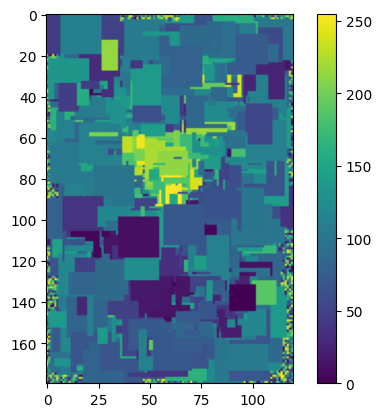

In [64]:
pob = pob_ini()
patch_size = 20
for i in range(2500):
  #Selección
  apt = calc_aptitud(pob)
  print("Cromosoma más apto de la generacion: ",i," Aptitud: ",np.max(apt))

  if np.max(apt) > 0.065:
    patch_size = 10
  if np.max(apt) > 0.1:
    patch_size = 5

  probabilidad = calc_prob(apt)
  current_selection = seleccion(pob,probabilidad)
  new_gen_list = list(current_selection[:4]) #Selección por elitismo
  #Cruce
  for z in range(0,46,2):
    hijo_1 = crossover_patch(current_selection[z],current_selection[z+1])
    hijo_2 = crossover_patch(current_selection[z+1],current_selection[z])
    new_gen_list.append(hijo_1)
    new_gen_list.append(hijo_2)
  pob = np.array(new_gen_list)

  #Mutacion
  for j in range(50):
    pob[j] = mutacion(prob_muta,pob[j])

print("Imagen resultante:")
imp(pob[np.argmax(apt)])